In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("DataScience_Salary.csv")
dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [3]:
dataset.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [4]:
qual=[]
quan=[]
for columnsName in dataset:
    if dataset[columnsName].dtype=='O':
        qual.append(columnsName)
    else:
        quan.append(columnsName)

In [5]:
dataset[quan].cov()

,work_year,salary,salary_in_usd
work_year,0.477829,-4.396988e+04,9.912104e+03
salary,-43969.883746,4.504366e+11,-9.986802e+08
salary_in_usd,9912.103784,-9.986802e+08,3.971806e+09


In [6]:
dataset[quan].corr()

,work_year,salary,salary_in_usd
work_year,1.000000,-0.094777,0.227528
salary,-0.094777,1.000000,-0.023611
salary_in_usd,0.227528,-0.023611,1.000000


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


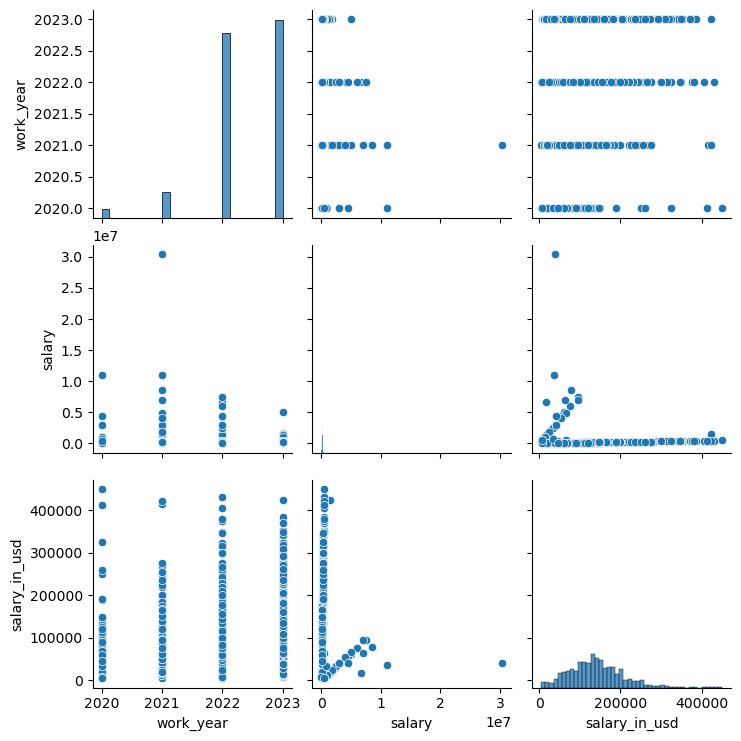

In [7]:
import seaborn as sns
sns.pairplot(dataset)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


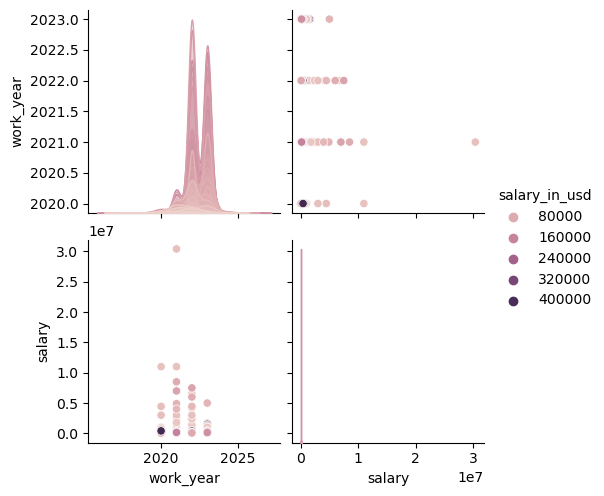

In [8]:
sns.pairplot(dataset,hue='salary_in_usd')
import matplotlib.pyplot as plt
plt.savefig('salary_in_usd.png')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [10]:
quan

['work_year', 'salary', 'salary_in_usd']

In [12]:
cal_vif(dataset[['salary', 'salary_in_usd']])

,variables,VIF
0,salary,1.060549
1,salary_in_usd,1.060549


In [18]:
#Independent Sample - unpaired T test
#Difference group(EN,SE) but same condition(salary)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
experience_level_EN=dataset[dataset['experience_level']=='EN']['salary_in_usd']
experience_level_SE=dataset[dataset['experience_level']=='SE']['salary_in_usd']
ttest_ind(experience_level_EN,experience_level_SE)

TtestResult(statistic=-22.27270990562851, pvalue=2.072086527606046e-101, df=2836.0)

In [20]:
#Dependant Sample-paired T Test
#same group(Yes) but different condition(Number of google review in lakhs,Entrance Fee in INR)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
experience_level_EN=dataset[dataset['experience_level']=='EN']['salary']
experience_level_EN1=dataset[dataset['experience_level']=='EN']['salary']
ttest_ind(experience_level_EN,experience_level_EN1)

TtestResult(statistic=0.0, pvalue=1.0, df=638.0)

In [21]:
dataset[dataset['experience_level']=='EN']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3703,2020,EN,FT,AI Scientist,300000,DKK,45896,DK,S
3704,2020,EN,FT,Data Scientist,55000,EUR,62726,DE,S
3705,2020,EN,PT,Data Scientist,19000,EUR,21669,IT,S
3706,2020,EN,FT,Data Scientist,105000,USD,105000,US,S


In [25]:
#ANOVA Analysis of variance(time needed to visit in hrs,Entrance Fee in INR)
import scipy.stats as stats
stats.f_oneway(dataset['work_year'],dataset['salary_in_usd'])

F_onewayResult(statistic=17394.186791881326, pvalue=0.0)

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('work_year ~ C(experience_level) + C(job_title) + C(experience_level):C(job_title)',data=dataset).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 92, but rank is 46
  warnings.warn('covariance of constraints does not have full '
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 276, but rank is 150
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(experience_level),-6.940944e-08,3.0,-5.670368e-08,1.000000e+00
C(job_title),1.707899e+01,92.0,4.549758e-01,9.994317e-01
C(experience_level):C(job_title),3.256610e+02,276.0,2.891816e+00,4.239418e-27
Residual,1.456239e+03,3569.0,NaN,NaN


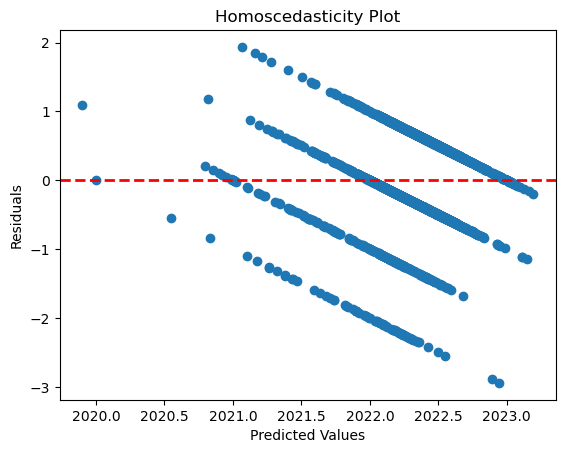

In [29]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
model = sm.OLS.from_formula('work_year ~ salary_in_usd + salary  +  C(experience_level) + C(job_title)', data=dataset).fit()
residuals = model.resid
# Get the predicted values
predicted_values = model.fittedvalues

# Create a scatter plot of residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Homoscedasticity Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

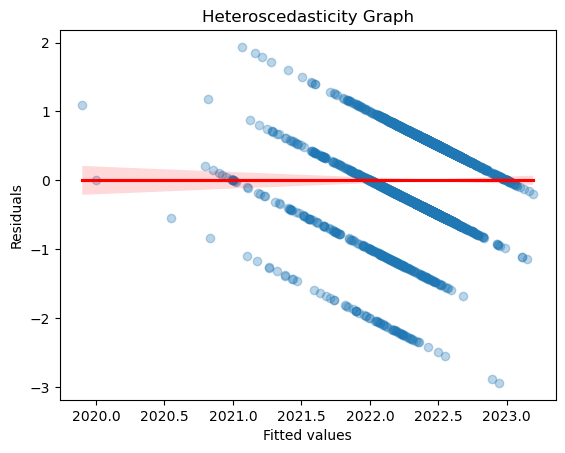

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=model.fittedvalues, y=model.resid, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity Graph')
plt.show()